In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show

In [3]:
df = pd.read_csv('Iris.csv')

In [7]:
df.shape

(150, 6)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['SepalLengthCm'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [15]:
np.unique(df['Species'], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [18]:
setosaSLC = df.loc[df['Species'] == 'Iris-setosa']['SepalLengthCm']

In [19]:
setosaSLC.describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: SepalLengthCm, dtype: float64

In [27]:
setosaSLC.mean()-sp.stats.norm.ppf(1-0.05/2)*.3525/(len(setosaSLC))**.5

4.908293780383347

In [26]:
setosaSLC.mean()+sp.stats.norm.ppf(1-0.05/2)*.3525/(len(setosaSLC))**.5

5.103706219616652

In [49]:
mean = 7
scale = 45
gennorm = sp.stats.norm.rvs(loc=mean, scale= scale, size= 10000)

In [42]:
def remove_outlier(inputdata, bound):
    s_mean = np.mean(inputdata)
    s_std = np.std(inputdata, ddof=1)
    return [v for i,v in enumerate(inputdata) if abs(v-s_mean)<bound*s_std], [[v for i,v in enumerate(inputdata) if abs(v-s_mean)>bound*s_std]]

In [50]:
gen_result, gen_out = remove_outlier(gennorm, 3)

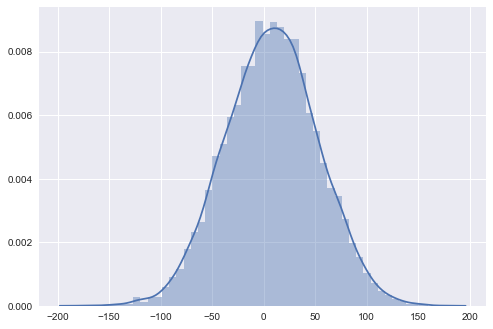

In [51]:
sns.distplot(gennorm)
show()

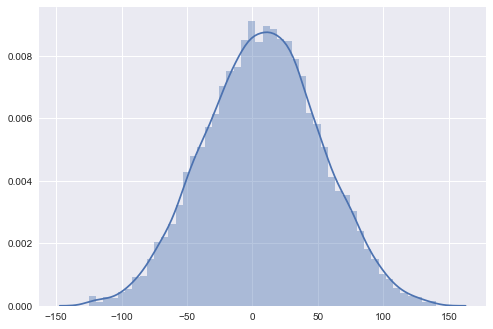

In [52]:
sns.distplot(gen_result)
show()

In [53]:
len(gennorm)

10000

In [54]:
len(gen_result)

9971

In [55]:
gen_out

[[-127.57515150280864,
  -127.41585541163658,
  -126.54418852235773,
  -156.64496140049351,
  142.59528209158162,
  173.38520463142817,
  -153.11823612703688,
  151.30781371352424,
  151.92145223689332,
  -147.88594772213156,
  142.23121737971636,
  151.8107911240351,
  -135.92245043635785,
  142.67186814707665,
  -137.3561233582586,
  152.7169485085879,
  153.5460273532976,
  144.17256638398982,
  -133.91807598351974,
  147.5761228045179,
  -141.51056974327784,
  155.54843493405974,
  157.11684275887922,
  -145.205047278342,
  -140.9273597356513,
  -139.21436839350886,
  -129.15184048769692,
  -175.3863681821085,
  -134.28428479770182]]

In [57]:
remove_outlier(setosaSLC,3)

([5.1,
  4.9,
  4.7,
  4.6,
  5.0,
  5.4,
  4.6,
  5.0,
  4.4,
  4.9,
  5.4,
  4.8,
  4.8,
  4.3,
  5.8,
  5.7,
  5.4,
  5.1,
  5.7,
  5.1,
  5.4,
  5.1,
  4.6,
  5.1,
  4.8,
  5.0,
  5.0,
  5.2,
  5.2,
  4.7,
  4.8,
  5.4,
  5.2,
  5.5,
  4.9,
  5.0,
  5.5,
  4.9,
  4.4,
  5.1,
  5.0,
  4.5,
  4.4,
  5.0,
  5.1,
  4.8,
  5.1,
  4.6,
  5.3,
  5.0],
 [[]])

In [67]:
def IQRoutlier(inputdata):
    s_mean = np.mean(inputdata)
    s_var = np.std(inputdata)
    IQR = np.percentile(inputdata,75)-np.percentile(inputdata,25)
    lower, upper = np.percentile(inputdata,25)-1.5*IQR, np.percentile(inputdata,75)+1.5*IQR
    return [v for v in inputdata if v-s_mean > lower and v-s_mean<upper]

In [69]:
len(IQRoutlier(gennorm))

9920

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


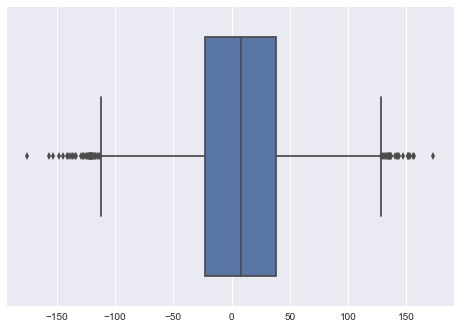

In [72]:
sns.boxplot(gennorm)
show()

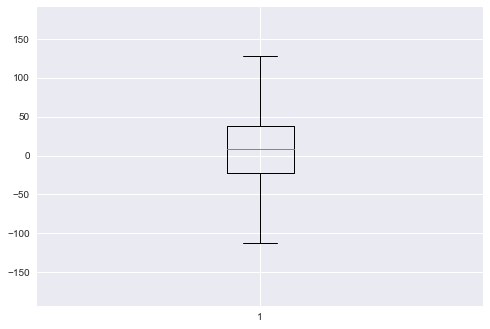

In [73]:
plt.boxplot(gennorm)
show()